## Preparation

In [1]:
from build_data import *
from find_shortest_path import *
import pandas as pd
import seaborn as sns
import random
import itertools
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
stations, underground_lines = build_data()

algorithms = ['UCS', 'Dijkstra', 'Astar', 'Greedy_BFS', 'Beam_Search10', 'Beam_Search15', 'Biastar']
astar = ["Real","Euclidean", "Manhattan", "Chebyshev", "Minkowski"]
weights = [0.25,0.5,0.75,1,1.25,1.5,1.75]

In [3]:
# 随意混合站点
df = pd.read_csv('./london/underground_stations.csv')
stations_list = df['name']
all_pairs = list(itertools.combinations(stations_list, 2))

random.seed(42)
random_pairs = random.sample(all_pairs, 50)

## Comparasion among various algorithms

In [36]:
cost_list = {}
accuracy = []
interation_times = []
execution_time = []

In [37]:
def get_path(start_station_name: str, end_station_name: str, map: dict[str, Station], algorithm):
    
    if algorithm == 'UCS':
        return get_path_UCS(start_station_name, end_station_name, stations)
    elif algorithm == 'Dijkstra':
        return get_path_Dijkstra(start_station_name, end_station_name, stations)
    elif algorithm == 'Astar':
        return get_path_Astar(start_station_name, end_station_name, stations, Real)
    elif algorithm == 'Greedy_BFS':
        return get_path_Greedy_BFS(start_station_name, end_station_name, stations)
    elif algorithm == 'Beam_Search10':
        return get_path_Beam_Search(start_station_name, end_station_name, stations, 10)
    elif algorithm == 'Beam_Search15':
        return get_path_Beam_Search(start_station_name, end_station_name, stations, 15)
    elif algorithm == 'Biastar':
        return get_path_Biastar(start_station_name, end_station_name, stations)

In [38]:
def test(algorithm):
    cost_list = []
    mean_interation_times = 0
    mean_execution_time = 0
    if algorithm == "UCS":
        print(1)
        for pair in random_pairs:
            _, cost, interation, execution = get_path(pair[0],pair[1],stations,algorithm)
            cost_list.append(cost)
            mean_interation_times = mean_interation_times + interation
            mean_execution_time = mean_execution_time + execution
        cost_list = [item for item in cost_list for _ in range(5)]
        print(cost_list)
        mean_interation_times = mean_interation_times/50
        mean_execution_time = mean_execution_time/50
    else:
        for pair in random_pairs:
            for i in range (5):
                _, cost, interation, execution = get_path(pair[0],pair[1],stations,algorithm)
                cost_list.append(cost)
                mean_interation_times = mean_interation_times + interation
                mean_execution_time = mean_execution_time + execution
        mean_interation_times = mean_interation_times/250
        mean_execution_time = mean_execution_time/250
    
    return cost_list, mean_interation_times, mean_execution_time

In [39]:
def calculate_accuracy(list1, list2):
    if len(list1) != len(list2):
        raise ValueError("列表长度不相同，无法比较")
        
    matches = sum(1 for x, y in zip(list1, list2) if x == y)

    accuracy = matches / len(list1)
    return accuracy

- **UCS** Due to high time cost, we give it up 

In [ ]:
# cost_list['UCS'], mean_interation_times, mean_execution_time = test('UCS')
# interation_times.append(mean_interation_times)
# execution_time.append(mean_execution_time)

1


- **Others**

In [40]:
for algorithm in algorithms[1:]:
    cost_list[algorithm], mean_interation_times, mean_execution_time = test(algorithm)
    interation_times.append(mean_interation_times)
    execution_time.append(mean_execution_time)

In [41]:
for algorithm in algorithms[1:]:
    accuracy.append(calculate_accuracy(cost_list[algorithm],cost_list['Astar']))

In [42]:
df = pd.DataFrame({'algorithm':algorithms[1:],'accuracy':accuracy,'interation_times':interation_times,'execution_time':execution_time})
df

,algorithm,accuracy,interation_times,execution_time
0,Dijkstra,1.00,190.74,33.255565
1,Astar,1.00,58.82,30.166078
2,Greedy_BFS,0.42,36.06,12.219296
3,Beam_Search10,0.96,54.60,27.011436
4,Beam_Search15,1.00,55.36,27.755625
5,Biastar,0.38,40.06,18.487828


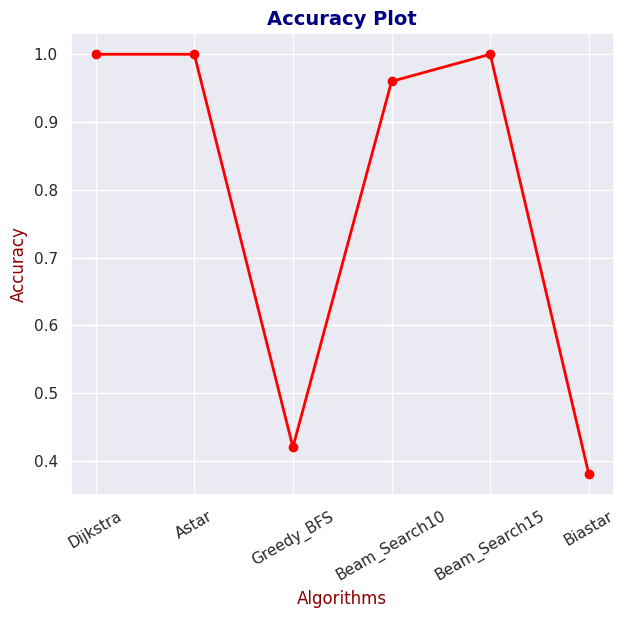

In [43]:
sns.set()
plt.figure(figsize=(7,6))

plt.plot(algorithms[1:], accuracy, color='red', linestyle='-', linewidth=2, marker='o', markersize=6)

plt.grid(True)

plt.title('Accuracy Plot', fontsize=14, fontweight='bold', color='navy')
plt.xlabel('Algorithms', fontsize=12, color='darkred')
plt.ylabel('Accuracy', fontsize=12, color='darkred')
plt.xticks(rotation=30)

plt.show()

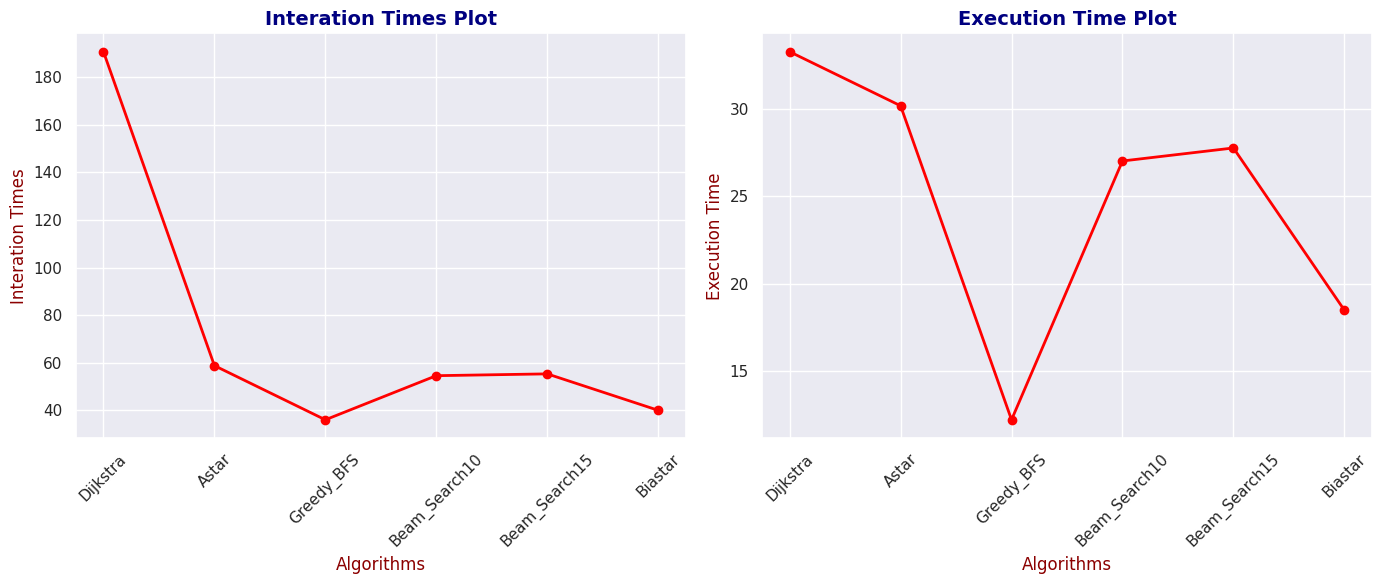

In [45]:
sns.set()
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)

plt.plot(algorithms[1:], interation_times, color='red', linestyle='-', linewidth=2, marker='o', markersize=6)
plt.grid(True)
plt.title('Interation Times Plot', fontsize=14, fontweight='bold', color='navy')
plt.xlabel('Algorithms', fontsize=12, color='darkred')
plt.ylabel('Interation Times', fontsize=12, color='darkred')
plt.xticks(rotation=45)

plt.subplot(1,2,2)

plt.plot(algorithms[1:], execution_time, color='red', linestyle='-', linewidth=2, marker='o', markersize=6)
plt.grid(True)
plt.title('Execution Time Plot', fontsize=14, fontweight='bold', color='navy')
plt.xlabel('Algorithms', fontsize=12, color='darkred')
plt.ylabel('Execution Time', fontsize=12, color='darkred')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Comparasion among A* with different heuristic functions

In [18]:
cost_list = {}
accuracy = []
interation_times = []
execution_time = []

In [19]:
def test(heuristic):
    cost_list = []
    mean_interation_times = 0
    mean_execution_time = 0
    for pair in random_pairs:
        for i in range (5):
            _, cost, interation, execution = get_path_Astar(pair[0],pair[1],stations,heuristic)
            cost_list.append(cost)
            mean_interation_times = mean_interation_times + interation
            mean_execution_time = mean_execution_time + execution
    mean_interation_times = mean_interation_times/250
    mean_execution_time = mean_execution_time/250
    
    return cost_list, mean_interation_times, mean_execution_time

In [20]:
for heuristic in astar:
    heuristic_func = globals().get(heuristic,None)
    cost_list[heuristic], mean_interation_times, mean_execution_time = test(heuristic_func)
    interation_times.append(mean_interation_times)
    execution_time.append(mean_execution_time)

In [21]:
for heuristic in astar:
    accuracy.append(calculate_accuracy(cost_list[heuristic],cost_list['Real']))

In [22]:
df = pd.DataFrame({'heuristic':astar,'accuracy':accuracy,'interation_times':interation_times,'execution_time':execution_time})
df

,heuristic,accuracy,interation_times,execution_time
0,Real,1.00,58.82,30.366026
1,Euclidean,1.00,58.78,36.064079
2,Manhattan,0.74,45.72,26.253257
3,Chebyshev,1.00,75.46,68.310269
4,Minkowski,1.00,68.98,43.478646


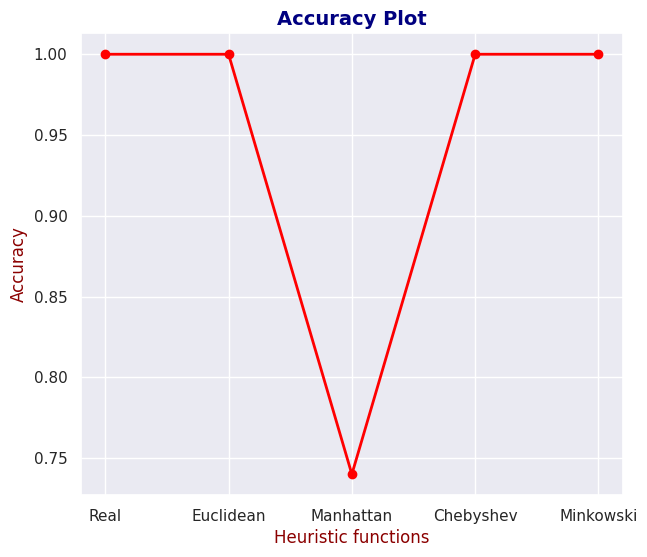

In [23]:
sns.set()
plt.figure(figsize=(7,6))

plt.plot(astar, accuracy, color='red', linestyle='-', linewidth=2, marker='o', markersize=6)

plt.grid(True)

plt.title('Accuracy Plot', fontsize=14, fontweight='bold', color='navy')
plt.xlabel('Heuristic functions', fontsize=12, color='darkred')
plt.ylabel('Accuracy', fontsize=12, color='darkred')

plt.show()

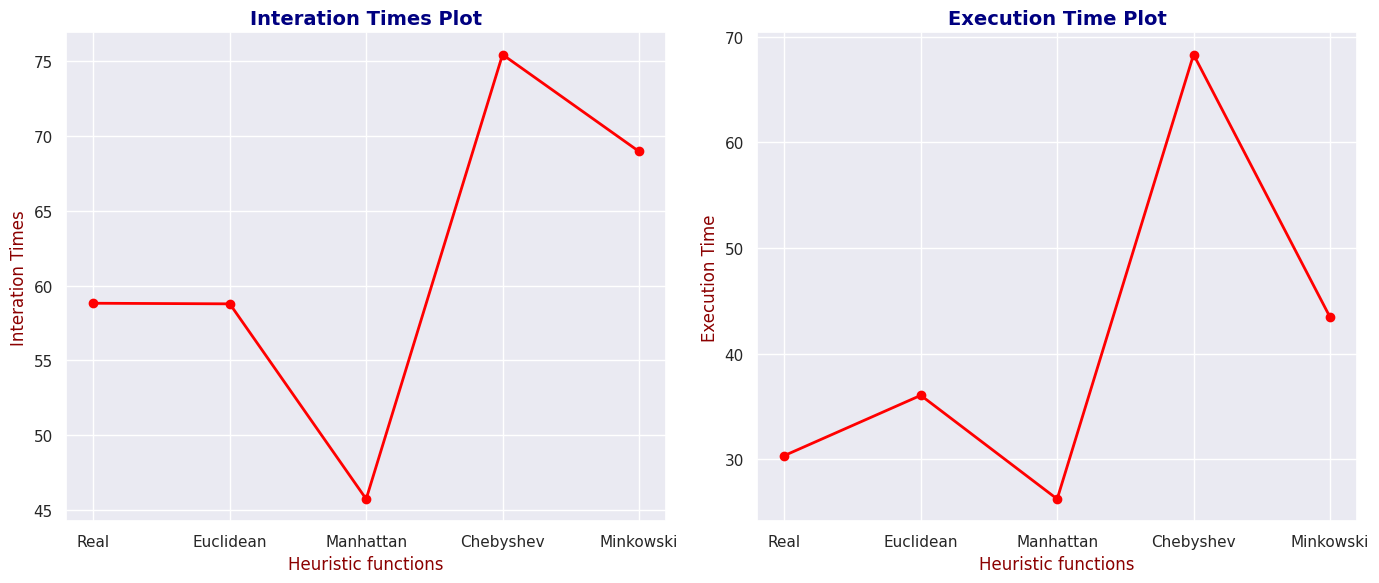

In [24]:
sns.set()
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)

plt.plot(astar, interation_times, color='red', linestyle='-', linewidth=2, marker='o', markersize=6)
plt.grid(True)
plt.title('Interation Times Plot', fontsize=14, fontweight='bold', color='navy')
plt.xlabel('Heuristic functions', fontsize=12, color='darkred')
plt.ylabel('Interation Times', fontsize=12, color='darkred')

plt.subplot(1,2,2)

plt.plot(astar, execution_time, color='red', linestyle='-', linewidth=2, marker='o', markersize=6)
plt.grid(True)
plt.title('Execution Time Plot', fontsize=14, fontweight='bold', color='navy')
plt.xlabel('Heuristic functions', fontsize=12, color='darkred')
plt.ylabel('Execution Time', fontsize=12, color='darkred')

plt.tight_layout()
plt.show()

## Comparasion among weighted A* with different weights

In [29]:
cost_list = {}
accuracy = []
interation_times = []
execution_time = []

In [30]:
def test(weight):
    cost_list = []
    mean_interation_times = 0
    mean_execution_time = 0
    for pair in random_pairs:
        for i in range (5):
            _, cost, interation, execution = get_path_Weighted_astar(pair[0],pair[1],stations,weight)
            cost_list.append(cost)
            mean_interation_times = mean_interation_times + interation
            mean_execution_time = mean_execution_time + execution
    mean_interation_times = mean_interation_times/250
    mean_execution_time = mean_execution_time/250
    
    return cost_list, mean_interation_times, mean_execution_time

In [31]:
for weight in weights:
    cost_list[weight], mean_interation_times, mean_execution_time = test(weight)
    interation_times.append(mean_interation_times)
    execution_time.append(mean_execution_time)

In [32]:
for weight in weights:
    accuracy.append(calculate_accuracy(cost_list[weight],cost_list[1]))

In [33]:
df = pd.DataFrame({'weight':weights,'accuracy':accuracy,'interation_times':interation_times,'execution_time':execution_time})
df

,weight,accuracy,interation_times,execution_time
0,0.25,1.00,142.12,79.401686
1,0.50,1.00,119.50,66.232471
2,0.75,1.00,93.24,50.870476
3,1.00,1.00,58.82,30.016594
4,1.25,0.78,39.98,18.425034
5,1.50,0.70,37.88,17.062773
6,1.75,0.54,35.04,15.520144


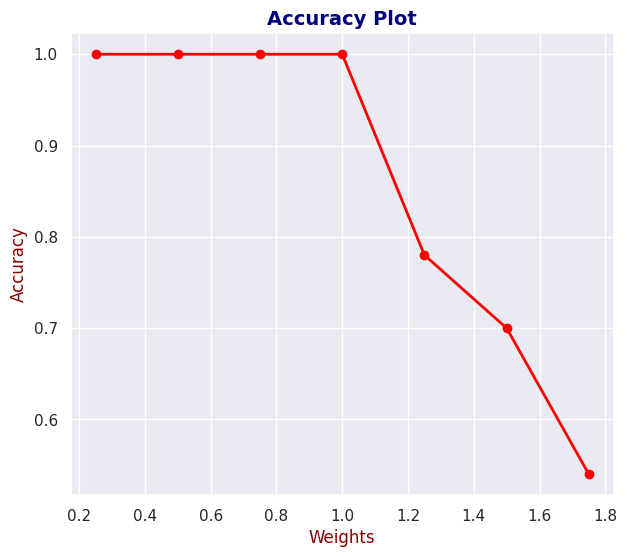

In [34]:
sns.set()
plt.figure(figsize=(7,6))

plt.plot(weights, accuracy, color='red', linestyle='-', linewidth=2, marker='o', markersize=6)

plt.grid(True)

plt.title('Accuracy Plot', fontsize=14, fontweight='bold', color='navy')
plt.xlabel('Weights', fontsize=12, color='darkred')
plt.ylabel('Accuracy', fontsize=12, color='darkred')

plt.show()

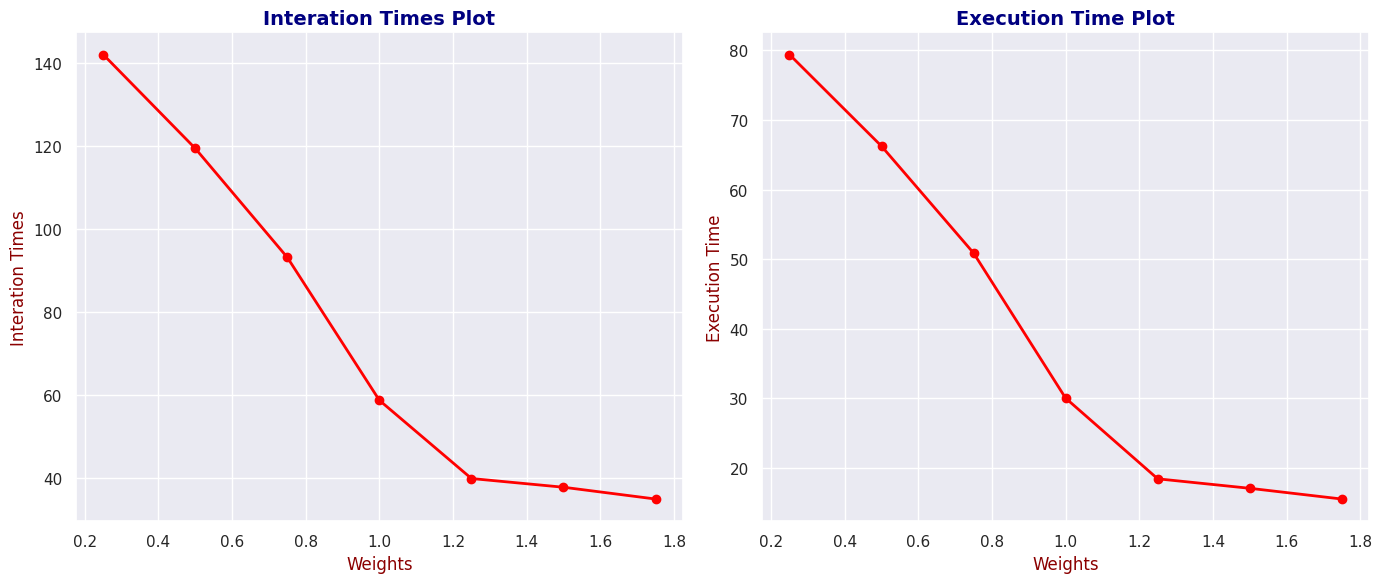

In [35]:
sns.set()
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)

plt.plot(weights, interation_times, color='red', linestyle='-', linewidth=2, marker='o', markersize=6)
plt.grid(True)
plt.title('Interation Times Plot', fontsize=14, fontweight='bold', color='navy')
plt.xlabel('Weights', fontsize=12, color='darkred')
plt.ylabel('Interation Times', fontsize=12, color='darkred')

plt.subplot(1,2,2)

plt.plot(weights, execution_time, color='red', linestyle='-', linewidth=2, marker='o', markersize=6)
plt.grid(True)
plt.title('Execution Time Plot', fontsize=14, fontweight='bold', color='navy')
plt.xlabel('Weights', fontsize=12, color='darkred')
plt.ylabel('Execution Time', fontsize=12, color='darkred')

plt.tight_layout()
plt.show()